In [3]:
import pandas as pd
import numpy as np
from IPython.display import display, HTML
import pandas as pd
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re
import time
import sqlite3
import os
import numpy as np
import shutil
import math
import seaborn as sns
import matplotlib.pyplot as plt
import operator



In [262]:
def clean_state_df(df):
    non_state_list=[geo_name for geo_name in df['GeoName'] if geo_name not in state_list]
    print(np.unique(non_state_list))
    df=df.loc[~df['GeoName'].isin(non_state_list),:]
    return(df)
def extract_feature(df,feature_list):
    df=df.loc[df['Description'].isin(feature_list),:]
    return df
def show_all_feature(df):
    feature_df=pd.DataFrame(df['Description'].value_counts())
    display(feature_df)

In [263]:
expenditure=pd.read_csv('./expenditure.csv')
expenditure_2016=expenditure.iloc[:,[1,5,8]]
state_list=["Alabama","Alaska","Arizona","Arkansas","California","Colorado",
  "Connecticut","Delaware",'District of Columbia',"Florida","Georgia","Hawaii","Idaho","Illinois",
  "Indiana","Iowa","Kansas","Kentucky","Louisiana","Maine","Maryland",
  "Massachusetts","Michigan","Minnesota","Mississippi","Missouri","Montana",
  "Nebraska","Nevada","New Hampshire","New Jersey","New Mexico","New York",
  "North Carolina","North Dakota","Ohio","Oklahoma","Oregon","Pennsylvania",
  "Rhode Island","South Carolina","South Dakota","Tennessee","Texas","Utah",
  "Vermont","Virginia","Washington","West Virginia","Wisconsin","Wyoming"]
show_all_feature(expenditure_2016)

,Description
Food and beverages purchased for off-premises consumption,60
Financial services and insurance,60
Other nondurable goods,60
Less: Receipts from sales of goods and services by nonprofit institutions,60
Other durable goods,60
Nondurable goods,60
Household consumption expenditures (for services),60
Furnishings and durable household equipment,60
Services,60
Final consumption expenditures of nonprofit institutions serving households (NPISHs),60


In [264]:
person_consumption_expenditures=clean_state_df(expenditure_2016)
person_consumption_expenditures=extract_feature(person_consumption_expenditures,['Personal consumption expenditures'])
person_consumption_expenditures=person_consumption_expenditures.loc[:,['GeoName','2016']]
person_consumption_expenditures.columns=['GeoName','person consumption expenditure']
print(person_consumption_expenditures.head(5))

[ ' and reflect Census Bureau midyear population estimates for years 2010-2016 available as of December 2016. Per capita values are computed from unrounded data.'
 'Far West' 'Great Lakes' 'Mideast' 'New England' 'Plains' 'Rocky Mountain'
 'Southeast' 'Southwest' 'United States' 'nan']
        GeoName  person consumption expenditure
24      Alabama                        152397.0
48       Alaska                         36758.0
72      Arizona                        239680.0
96     Arkansas                         92984.0
120  California                       1641724.0


In [265]:
gdp=pd.read_csv('./gdp.csv')
gdp=gdp.loc[:,['GeoName','Description','2016Q1','2016Q2','2016Q3','2016Q4']]
#print(gdp.loc[gdp['2016Q1']=='(D)',:])


In [266]:
show_all_feature(gdp)

,Description
"Professional, scientific, and technical services",60
Government,60
Management of companies and enterprises,60
"Arts, entertainment, and recreation",60
"Other services, except government",60
Utilities,60
Finance and insurance,60
Administrative and waste management services,60
All industry total,60
Mining,60


In [267]:
gdp=gdp.loc[~gdp['2016Q1'].isin(['(L)','(D)']),:]# D and L means missing values I print D previously,
gdp['2016']=gdp['2016Q1'].astype(float)+gdp['2016Q2'].astype(float)+gdp['2016Q3'].astype(float)+gdp['2016Q4'].astype(float)
gdp.head(5)

,GeoName,Description,2016Q1,2016Q2,2016Q3,2016Q4,2016
0,United States,All industry total,18170091,18337791,18561915,18755370,73825167.0
1,United States,Private industries,15913806,16069119,16273097,16454134,64710156.0
2,United States,"Agriculture, forestry, fishing, and hunting",164987,162132,160066,152489,639674.0
3,United States,Mining,235103,258292,271615,293309,1058319.0
4,United States,Utilities,282165,283865,293901,292534,1152465.0


In [268]:
gdp_all_industry=extract_feature(gdp,['All industry total'])
gdp_all_industry=clean_state_df(gdp_all_industry)
gdp_all_industry=gdp_all_industry.loc[:,['GeoName','2016']]
gdp_all_industry.columns=['GeoName','gdp']
gdp_all_industry.head(5)

['Far West' 'Great Lakes' 'Mideast' 'New England' 'Plains' 'Rocky Mountain'
 'Southeast' 'Southwest' 'United States']


,GeoName,gdp
24,Alabama,819445.0
48,Alaska,202852.0
72,Arizona,1211807.0
96,Arkansas,482755.0
120,California,10410688.0


In [269]:
income_wage=pd.read_csv('./income_wage.csv')
income_wage=income_wage.loc[:,['GeoName','Description','2016']]
income_wage['GeoName']=income_wage['GeoName'].replace('Alaska*','Alaska')
income_wage['GeoName']=income_wage['GeoName'].replace('Hawaii*','Hawaii')
show_all_feature(income_wage)


,Description
Employer contributions for government social insurance,120
Proprietors employment,60
Employee and self-employed contributions for government social insurance,60
Nonfarm proprietors' income,60
Wage and salary employment,60
Farm proprietors' income,60
Nonfarm personal income 1/,60
Total employment,60
Earnings by place of work,60
Per capita personal income (dollars) 4/,60


In [270]:
income_wage=extract_feature(income_wage,['Personal income (thousands of dollars)'])
income_wage=clean_state_df(income_wage)
income_wage=income_wage.loc[:,['GeoName','2016']]
income_wage.columns=['GeoName','personal income']
income_wage.head(5)

['Far West' 'Great Lakes' 'Mideast' 'New England' 'Plains' 'Rocky Mountain'
 'Southeast' 'Southwest' 'United States']


,GeoName,personal income
23,Alabama,1.891620e+08
46,Alaska,4.128328e+07
69,Arizona,2.801200e+08
92,Arkansas,1.186980e+08
115,California,2.212691e+09


In [271]:
RPP=pd.read_csv('./RPP.csv')
RPP=RPP.loc[:,['GeoName','Description','2016']]
show_all_feature(RPP)
RPP=clean_state_df(RPP)
RPP=extract_feature(RPP,['RPPs: All items'])

,Description
RPPs: Goods,52
RPPs: Services: Other,52
RPPs: Services: Rents,52
RPPs: All items,52


['United States' 'nan']


In [272]:
RPP=RPP.loc[:,['GeoName','2016']]
RPP.columns=['GeoName','RPP']

In [273]:
irp=pd.read_csv('./implicit regional price inflator.csv')
irp=irp.loc[:,['GeoName','Description','2016']]
show_all_feature(irp)
irp=clean_state_df(irp)
irp=irp.loc[:,['GeoName','2016']]
irp.columns=['GeoName','irp']

,Description
Implicit regional price deflator,51


[ nan  nan  nan  nan]


In [274]:
from functools import reduce
dfs = [irp, RPP,gdp_all_industry,income_wage,person_consumption_expenditures]
df_final = reduce(lambda left,right: pd.merge(left,right,on='GeoName'), dfs)

In [275]:
df_final.to_csv('merge_state_data2.csv')

In [277]:
import re
import requests


In [280]:
if os.path.exists('./dependent_variable_state_data/'):
    pass
else:
    os.mkdir('./dependent_variable_state_data/')
if os.path.exists('./dependent_variable_state_data_cleaned/'):
    pass
else:
    os.mkdir('./dependent_variable_state_data_cleaned/')

In [281]:
mta_web='https://www.bls.gov/bdm/bdmstate.htm'
response=requests.get(mta_web)
web_content=response.content
soup = BeautifulSoup(web_content, 'html.parser')
final_link=[]
for link in soup.find_all('a',{'href':re.compile('/web/cewbd/+(.*?)table1.txt')}):
    temp_link='https://www.bls.gov'+link.get('href')
    final_link.append(temp_link)
import os


In [289]:
for link in final_link:#uncomment the bottom lines of code if you wanna scrape the data again
    file_name=re.sub('https://www.bls.gov/web/cewbd/','',link)
    #response=requests.get(link) 
    with open('./dependent_variable_state_data/'+file_name, 'wb') as f:
        f.write(response.content)

In [299]:
target_dir='./dependent_variable_state_data/'
file_list=os.listdir(target_dir)


In [300]:
for j in file_list:
    with open(target_dir+j) as fp:
        temp_year=1991
        lines = fp.readlines()
        count=0
        for i in lines:
            if count==2:
                file_name=i.split()
                file_name=(' ').join(file_name)
                f = open('./dependent_variable_state_data_cleaned/'+file_name+".txt", "a")
            count=count+1
            line_len=len(i.split())
            if line_len>0 and line_len>=8 and line_len<=10:
                temp_line=i.split()
                temp_line=[re.sub(',','',x) for x in temp_line]
                if re.search('[0-9]{4}',temp_line[0]):
                    if int(temp_line[0])>temp_year:
                        temp_year=int(temp_line[0])
                if line_len==8:
                    temp_line.insert(0,str(temp_year))
                    new_line=('/').join(temp_line)
                    f.write("%s\n" % new_line)
                if line_len==9:
                    new_line=('/').join(temp_line)
                    f.write("%s\n" % new_line)
        f.close()    

In [52]:
output_dir='./dependent_variable_state_data_cleaned/'
output_file_list=os.listdir(output_dir)

In [53]:
final_result=pd.DataFrame(columns=['state','net_change','total_expand','expand_establish',
                     'open_establish','total_contract','contract_establish','end_establish'])

In [54]:
for i in output_file_list:
    temp_state=re.sub('.txt','',i)
    temp_df=pd.read_table(output_dir+i,sep='/',header=None)
    temp_df.columns=['year','month','net_change','total_expand','expand_establish',
                     'open_establish','total_contract','contract_establish','end_establish']
    temp_df_2016=temp_df.loc[temp_df['year']==2016,:]
    temp_result=pd.DataFrame(temp_df_2016.iloc[:,2:].apply(sum,axis=0)).T
    temp_result['state']=temp_state
    final_result=final_result.append(temp_result)

In [55]:
data1=pd.read_csv('./merge_state_data1.csv')
data2=pd.read_csv('./merge_state_data2.csv')
data2=data2.iloc[:,1:]
data_merge=pd.merge(data1,data2,left_on=data1.state,right_on=data2.GeoName)
final_state=pd.merge(data_merge,final_result,left_on=data_merge.state,right_on=final_result.state)
state=final_state['state_x']


In [56]:
def convert_str_column(df,column_list):
    for i in column_list:
        df[i]=[re.sub(',','',x) for x in df[i]]
        df[i]=df[i].astype(float)
    return df
clean_column_list=['water_area','land_area','total_employed','total_engi','member of unions','temporary_visa_engi','totals_sicence','temporary_visa_science']
final_state=convert_str_column(final_state,clean_column_list)

In [57]:
final_state=final_state.drop(['state_x','state_y','GeoName'],axis=1)
final_state.insert(0,'state',state)

In [58]:
final_state_copy=final_state

In [59]:
final_state.columns=['state', 'total_engi', 'temporary_visa_engi', 'total_science',
       'temporary_visa_science', 'total_area_sqm', 'land_area', 'water_area',
       'total_employed', 'member of unions', 'percent of employed',
       'represented by unions', 'percentage of employed', 'irp', 'RPP', 'gdp',
       'personal income', 'person consumption expenditure',
       'contract_establish', 'end_establish', 'expand_establish', 'net_change',
       'open_establish', 'total_contract', 'total_expand']

In [60]:
final_state.to_csv('final_state_data.csv',index=False)

In [61]:
pd.set_option('display.max_columns', 30)

In [97]:
final_state.columns

Index(['state', 'total_engi', 'temporary_visa_engi', 'totals_sicence',
       'temporary_visa_science', 'total_area_sqm', 'land_area', 'water_area',
       'total_employed', 'member of unions', 'percent of employed',
       'represented by unions', 'percentage of employed', 'irp', 'RPP', 'gdp',
       'personal income', 'person consumption expenditure',
       'contract_establish', 'end_establish', 'expand_establish', 'net_change',
       'open_establish', 'total_contract', 'total_expand'],
      dtype='object')

NameError: name 'final_state' is not defined

(-23.81011947431303, 851.81011947431307)

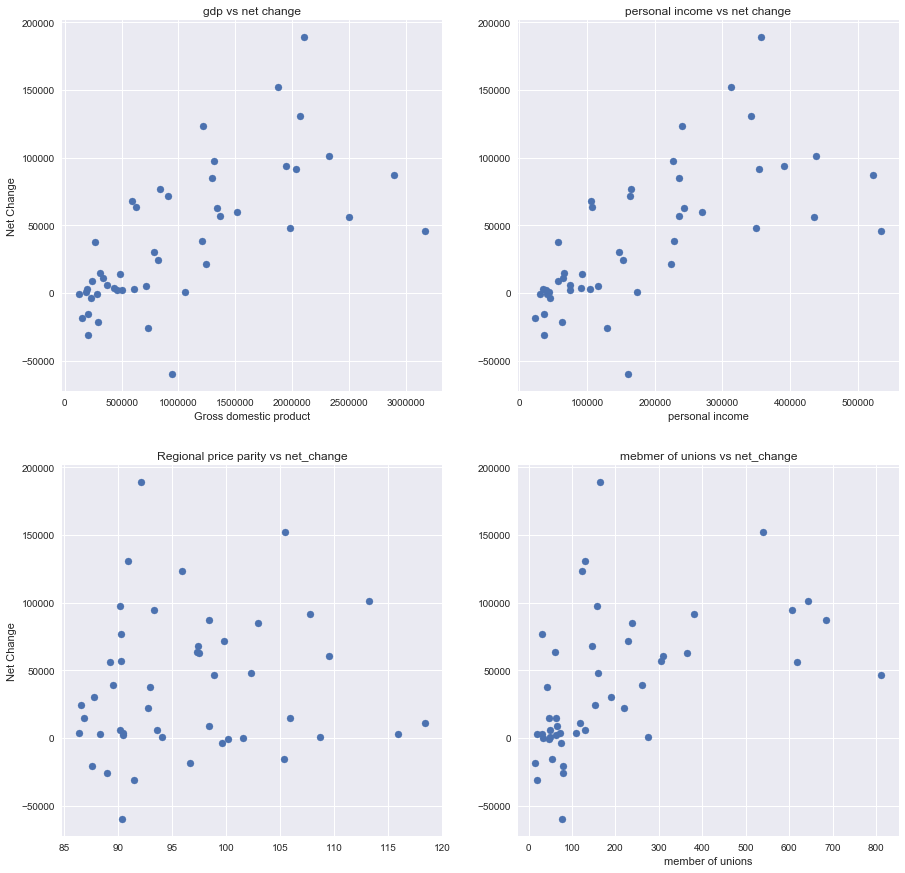

(-23.81011947431303, 851.81011947431307)

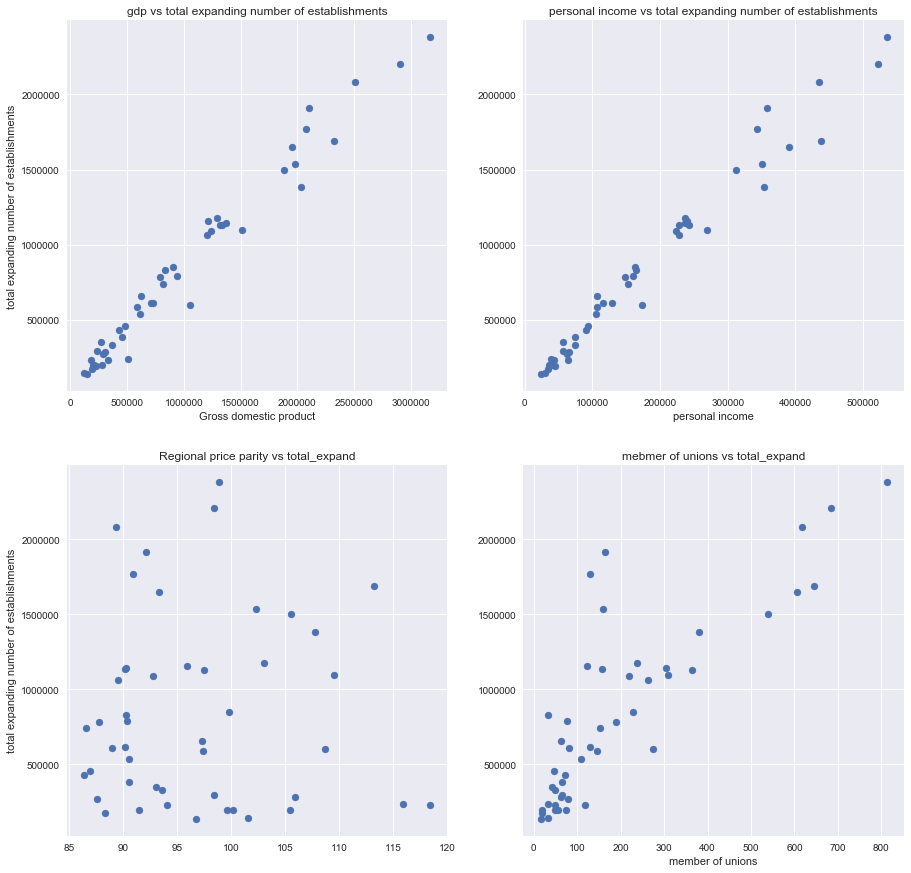

NameError: name 'final_state1' is not defined

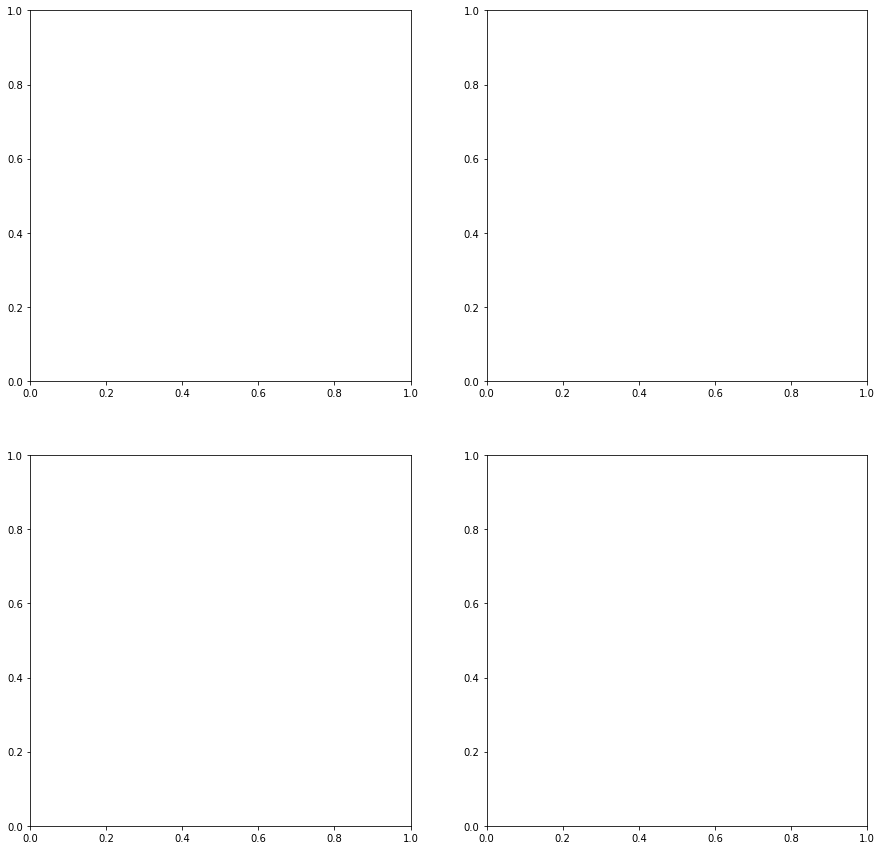